# Statistics for Machine Learning Mini Project

# 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed

In [1]:
#import 'pandas' 
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [2]:
data_fifa=pd.read_csv('fifa_stats.csv')
data_fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
data_fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [4]:
#all data type are perfectly assingend from respective their variable .

In [5]:
data_fifa.isnull().sum()/len(data_fifa)*100

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [6]:
#above colum only 0.95% null value in ,as per  my assumption i do'nt drop in club column.

In [7]:
data_fifa.shape

(2000, 15)

# a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [8]:
n=200

In [9]:
import random
random.seed(1)
num_sample=random.sample(population=list(data_fifa['Age']),k=200)

In [10]:
sample_std=statistics.stdev(num_sample)
print('std check for sample age ',sample_std)

std check for sample age  3.7237658574088703


In [11]:
sample_mean=np.mean(num_sample)
print('check for sample_mean',sample_mean)

check for sample_mean 27.27


In [12]:
population_mean=np.mean(data_fifa['Age'])
population_std=statistics.stdev(data_fifa['Age'])
print('check population mean ',population_mean)
print('check population std',population_std)

check population mean  27.2315
check population std 3.8590612753574516


In [13]:
z_value=(sample_mean-population_mean)/(sample_std/np.sqrt(n))
print('Central_limit_therom ' ,z_value)

Central_limit_therom  0.1462154824880671


In [14]:
standard_error = population_std/np.sqrt(n)
print('standard error ',standard_error)

standard error  0.272876839681966


In [15]:
#We can see mean of population is almost same as mean of sample. The distribution plot of sample means is much more improved.
#Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the
#sample means cluster more and more around the true population mean.

# b) Is there any evidence that the players overall rating is greater than 80?

In [16]:
data_fifa['Overall_rating'].shape

(2000,)

H0 : average overall rating <= 80 Ha : average ovearll rating > 80

In [17]:
#assumption
#consider sample size as 200 from population overall rating
#as sample size is > 30 and pop_std is know,we proceed with z_test and

In [18]:
random.seed(1)
sample = random.sample(population=list(data_fifa['Overall_rating']),k=200)
print(sample)

[82, 77, 75, 75, 76, 84, 80, 82, 77, 76, 77, 77, 76, 78, 75, 80, 83, 77, 86, 75, 75, 78, 78, 76, 76, 75, 91, 76, 77, 80, 76, 75, 80, 76, 75, 83, 75, 79, 86, 87, 87, 76, 77, 89, 75, 75, 78, 76, 80, 75, 78, 76, 86, 77, 80, 77, 77, 77, 80, 79, 80, 76, 80, 77, 75, 79, 75, 87, 78, 75, 75, 77, 75, 76, 83, 81, 76, 76, 75, 79, 82, 76, 79, 75, 75, 76, 77, 75, 75, 77, 75, 75, 76, 81, 79, 79, 76, 75, 77, 75, 75, 77, 78, 76, 75, 86, 77, 80, 76, 75, 78, 78, 76, 81, 78, 77, 76, 75, 76, 76, 78, 83, 77, 76, 77, 83, 75, 81, 77, 75, 78, 77, 76, 86, 77, 85, 79, 76, 75, 76, 76, 77, 78, 76, 81, 81, 77, 80, 88, 75, 81, 77, 75, 77, 80, 78, 77, 79, 77, 79, 77, 75, 80, 76, 76, 75, 76, 90, 78, 75, 75, 75, 75, 75, 75, 76, 77, 75, 82, 77, 75, 77, 80, 78, 75, 84, 77, 75, 78, 77, 77, 81, 75, 77, 78, 77, 75, 78, 79, 91]


In [19]:
pop_mean = np.mean(data_fifa['Overall_rating'])
pop_std = statistics.stdev(data_fifa['Overall_rating'])
samp_mean = np.mean(sample)
samp_std = statistics.stdev(data_fifa['Overall_rating'])
n = len(sample)
print('pop_mean ',pop_mean)
print('pop_std ',pop_std)
print('samp_mean ',samp_mean)
print('samp_std ',samp_std)
print('samp_len ',n)


pop_mean  78.197
pop_std  3.2859686235412306
samp_mean  77.965
samp_std  3.2859686235412306
samp_len  200


In [20]:
z_critical = stats.norm.isf(q=0.05)
print('z_critical',round(z_critical,2))

z_critical 1.64


In [21]:
z_score=(samp_mean-pop_mean)/(pop_std/np.sqrt(n))
z_score

-0.9984804605862978

In [22]:
p_value = stats.norm.sf(z_score) #since it is right tail test 
print('p_value ',p_value)

p_value  0.8409767826605765


In [23]:
#as pval is greater than 0.05 and z_score < z_critical we fail to reject null hypothesis

# c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [24]:
data_fifa['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [25]:
stats.shapiro(data_fifa['Potential'])

ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)

H0 : mu1 = mu2 

In [26]:
right = data_fifa[data_fifa['Preferred Foot']=='Right']['Potential']
left = data_fifa[data_fifa['Preferred Foot']=='Left']['Potential']

In [27]:
stats.kruskal(right,left)

KruskalResult(statistic=1.481069098122691, pvalue=0.22360732687859053)

In [28]:
#as p_val is > 0.05 we fail to reject null hypotheiss,

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

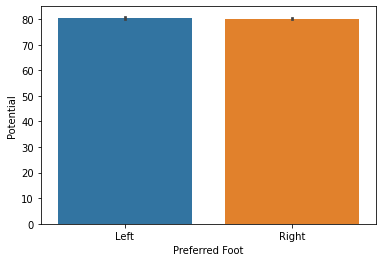

In [29]:
sns.barplot(x='Preferred Foot',y='Potential',data=data_fifa)

# d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].



In [30]:
print(stats.shapiro(data_fifa['Overall_rating']))
print(stats.shapiro(data_fifa['Potential']))

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)
ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)


In [31]:
#as data is not normally distributed 

In [32]:
data_fifa[['Overall_rating','Potential']].corr(method='spearman')

,Overall_rating,Potential
Overall_rating,1.000000,0.690448
Potential,0.690448,1.000000


In [33]:
#as per spearman correlation are positively correlated with 0.69

e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [34]:
stats.shapiro(data_fifa['Skill Moves'])

ShapiroResult(statistic=0.8852578401565552, pvalue=3.817420415422227e-36)

In [35]:
#as p_val is < 0.05 we prefer to use non parametric test which is kruskal

H0 : all means are equal Ha : atleast one mean is different

In [36]:
data_fifa['Skill Moves'].value_counts()

3    828
4    544
2    395
1    194
5     39
Name: Skill Moves, dtype: int64

In [37]:
n1 = data_fifa[data_fifa['Skill Moves']==1]['Overall_rating']
n2 = data_fifa[data_fifa['Skill Moves']==2]['Overall_rating']
n3 = data_fifa[data_fifa['Skill Moves']==3]['Overall_rating']
n4 = data_fifa[data_fifa['Skill Moves']==4]['Overall_rating']
n5 = data_fifa[data_fifa['Skill Moves']==5]['Overall_rating']

In [38]:
stats.kruskal(n1,n2,n3,n4,n5)

KruskalResult(statistic=104.85780927711181, pvalue=9.082225777036205e-22)

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

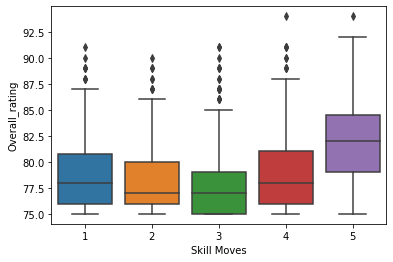

In [39]:
sns.boxplot(data_fifa['Skill Moves'],data_fifa['Overall_rating'])

# 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 



In [40]:
data_phone = pd.read_csv('phone.csv')
data_phone

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [41]:
data_phone.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [42]:
data_phone['date'] = pd.to_datetime(data_phone['date'])
data_phone['date'].dtype

dtype('<M8[ns]')

In [43]:
data_phone['month'] = pd.to_datetime(data_phone['month'].str.upper(), format='%Y-%m', yearfirst=False)

In [44]:
data_phone['month'].dtypes

dtype('<M8[ns]')

In [45]:
data_phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [46]:
data_phone['duration']

0      221.321120
1       81.610599
2      143.109111
3      111.888670
4      246.695171
          ...    
815    185.328156
816     89.819383
817    117.604998
818     77.834006
819    146.000584
Name: duration, Length: 820, dtype: float64

In [47]:
pop_mean = data_phone['duration'].mean()
print('pop_mean ',pop_mean)

pop_mean  144.30493555983546


In [48]:
pop_len = len(data_phone['duration'])
print('population length ',pop_len)

population length  820


In [49]:
random.seed(1)
sample = random.sample(population=list(data_phone['duration']),k=100)
sample_mean = np.mean(sample)
sample_std = statistics.stdev(data_phone['duration'])
n = len(sample)
print('sample_mean ',sample_mean)

sample_mean  138.1944224164


In [50]:
interval = stats.norm.interval(alpha=0.95,loc=sample_mean,scale=pop_std/np.sqrt(n))
interval

(137.55038440075305, 138.83846043204693)

In [51]:
interval = stats.norm.interval(alpha=0.99,loc=sample_mean,scale=pop_std/np.sqrt(n))
interval

(137.348012989294, 139.04083184350597)

In [52]:
#the wider region observed in 99% confidence interval

In [53]:
data_phone['network'].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [54]:
n = len(data_phone['network'])
print(n)

820


In [55]:
observed = data_phone['network'].value_counts().values
print(observed)

[215 215 150  87  84  42  27]


In [56]:
expected_freq = []
expected_freq.append(n/len(observed))
expected_freq

[117.14285714285714]

In [57]:
expected =expected_freq*7
expected

[117.14285714285714,
 117.14285714285714,
 117.14285714285714,
 117.14285714285714,
 117.14285714285714,
 117.14285714285714,
 117.14285714285714]

In [58]:
stats.chisquare(f_obs=observed,f_exp=expected)

Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)

<AxesSubplot:xlabel='network', ylabel='count'>

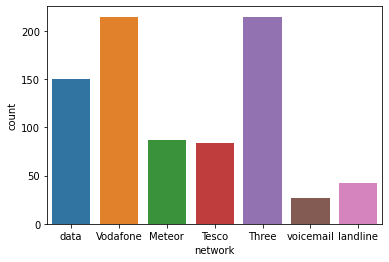

In [59]:
sns.countplot(data_phone['network'])

In [60]:
#as p_val < 0.05 we reject null hypothesis 

# c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

<AxesSubplot:xlabel='network', ylabel='duration'>

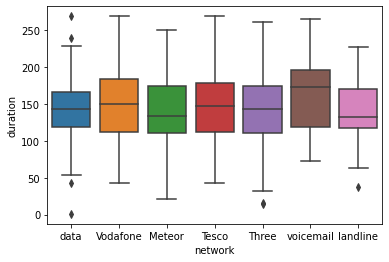

In [61]:
sns.boxplot(data_phone['network'],data_phone['duration'])

# d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [62]:
#H0 : all the averages are equal / no related
#Ha : atleast one id different / relation exits

In [63]:
data_phone['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [72]:
num1 = data_phone[data_phone['item']=='call']['duration']
num2 = data_phone[data_phone['item']=='sms']['duration']
num3 = data_phone[data_phone['item']=='data']['duration']

In [73]:
stats.levene(num1,num2,num3)

LeveneResult(statistic=3.4300976447008424, pvalue=0.03285087780533987)

In [74]:
stats.f_oneway(num1,num2,num3)

F_onewayResult(statistic=1.9313964906864993, pvalue=0.1456068656611744)

In [67]:
#as p val is > 0.05 we fail to reject null hypothesis,

# e) Perform statistical tests to identify the relation between network and network_type.

In [68]:
observed = pd.crosstab(data_phone['network_type'],data_phone['network'])
observed = observed.values
observed

array([[  0,   0,   0,   0, 150,   0,   0],
       [  0,   0,   0,   0,   0,  42,   0],
       [ 87,  84, 215, 215,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  27]], dtype=int64)

In [69]:
chivalue,p,df,expected = stats.chi2_contingency(observed=observed,correction=False)
print('Chi:',chivalue)
print('P value',p)
print('df:',df)
print('expected',expected)

Chi: 2460.0
P value 0.0
df: 18
expected [[ 15.91463415  15.36585366  39.32926829  39.32926829  27.43902439
    7.68292683   4.93902439]
 [  4.45609756   4.30243902  11.01219512  11.01219512   7.68292683
    2.15121951   1.38292683]
 [ 63.76463415  61.56585366 157.57926829 157.57926829 109.93902439
   30.78292683  19.78902439]
 [  2.86463415   2.76585366   7.07926829   7.07926829   4.93902439
    1.38292683   0.88902439]]


In [70]:
data_phone['network'].value_counts().dtype

dtype('int64')

In [71]:
#data is ambiguity 